# Прогнозируем временные ряды продаж товаров
В этом задании предлагается проанализировать датасет продаж различных товаров и построить предсказание на 24 дня вперед с `2018-12-07`.

В ноутбуке содержится ряд вопросов, которые подскажут, на что стоит обратить внимание при прогнозировании. Ответы на них следует оформлять текстом и иллюстрировать кодом/визуализациями.


Подробное описание датасетов содержится в файле `dataset/README.md`.

<b>При выполнении задания нельзя использовать библиотеку etna.</b>
<!-- Кроме самих целевых временных рядов, можно будет использовать исторические данные о проведенных акциях.  
[Подробное описание датасета](https://data.world/data-society/causal-effects-in-time-series) -->

***
# 0. Загрузка датасета
В этой части не нужно писать никакого дополнительного кода.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls dataset

ls: cannot access 'dataset': No such file or directory


In [ ]:
import pandas as pd

# загружаем датасет с продажами продуктов
df_products = pd.read_csv("/content/drive/MyDrive/Tinkoff/timeseries/dataset/products.csv", index_col=0)

# загружаем датасет с рекламными акциями
df_promotions = pd.read_csv("/content/drive/MyDrive/Tinkoff/timeseries/dataset/promotions.csv", index_col=0)

In [ ]:
df_products

,product_10,product_11,product_12,product_13,product_14,product_15,product_16,product_17,product_18,product_19,...,product_30,product_31,product_32,product_33,product_34,product_35,product_36,product_37,product_38,product_39
2016-01-01,2616.3,3548.8,3898.3,2173.9,845.82,1600.8,3019.2,488.03,2924.9,575.77,...,2394.3,1284.2,1996.5,3888.6,951.88,434.17,2313.1,1946.3,2045.0,2440.3
2016-01-02,2507.9,3666.3,3987.2,2309.4,835.09,1589.1,2982.1,993.10,2567.3,597.55,...,2335.8,1265.1,2079.5,3793.9,1112.00,429.92,2242.9,2064.1,2076.4,2304.4
2016-01-03,2548.7,3593.0,3955.7,2365.1,828.74,1527.7,3356.4,508.29,3080.3,595.60,...,2389.3,1256.0,2054.2,3937.5,1100.40,451.81,2500.4,1884.0,1906.3,2244.8
2016-01-04,2492.4,3432.9,4024.1,2286.7,802.93,1614.8,2352.6,473.96,3042.9,597.33,...,2418.8,1215.5,2095.5,4274.6,1081.20,448.80,2543.8,1834.8,1935.1,2255.8
2016-01-05,2707.5,3661.1,4041.6,2293.0,819.55,1584.4,2529.2,630.37,3094.1,571.56,...,2464.4,1197.6,2292.7,3897.3,1039.00,441.35,2261.1,2039.7,1762.8,2367.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-02,2269.6,3147.5,3733.4,3401.0,702.45,1024.1,2873.5,1368.90,2887.3,461.26,...,3150.9,1262.3,2758.0,4180.6,1218.50,336.35,2654.0,1748.9,1888.7,3108.5
2018-12-03,2333.2,3198.4,3832.4,3233.2,639.89,1207.5,3223.9,1532.50,3096.4,505.17,...,3076.1,1192.6,2729.4,3886.1,1135.70,334.64,2309.7,1790.3,2007.2,2875.7
2018-12-04,2284.4,3102.0,3806.4,3221.4,706.96,1220.2,3373.5,1538.80,2830.2,490.88,...,3202.6,1122.5,2975.0,4198.9,1145.40,343.34,2509.4,1629.4,1901.1,2607.0
2018-12-05,2357.8,3294.9,3638.2,3205.1,678.69,1217.0,3319.0,1448.60,2731.2,443.97,...,3339.9,1212.8,2813.6,4120.2,1155.20,348.88,2536.6,1546.8,1971.6,2676.0


In [ ]:
print(f"Датасет с продажами: {df_products.shape}")
print(f"Датасет с акциями: {df_promotions.shape}")

Датасет с продажами: (1071, 30)
Датасет с акциями: (1095, 1000)


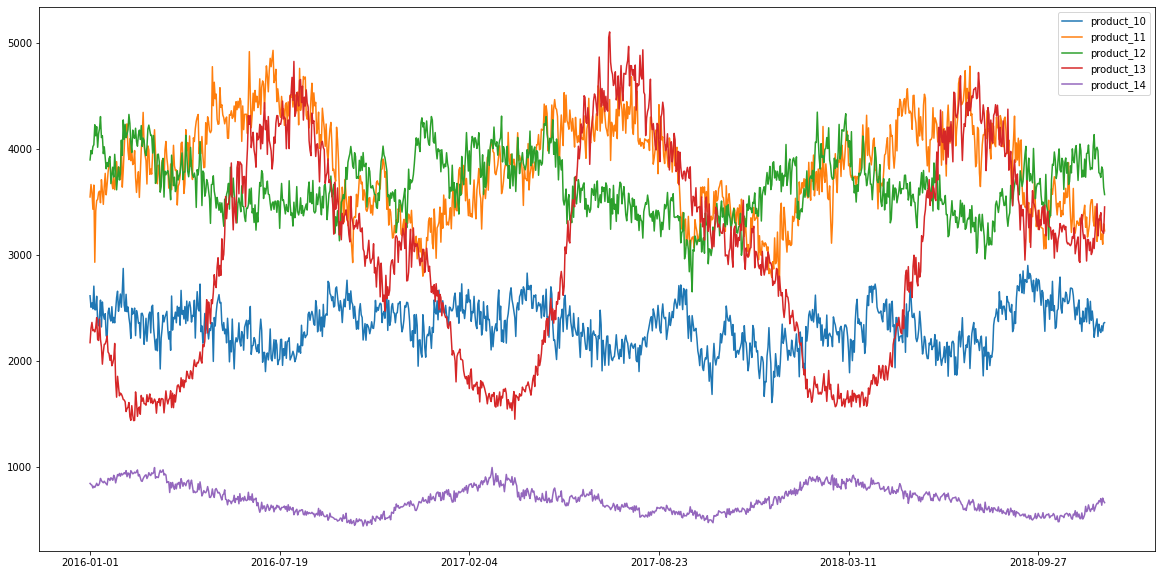

In [ ]:
# посмотрим, как выглядят ряды, которые нужно будет спрогнозировать
_ = df_products.iloc[:, pd.IndexSlice[0:5]].plot(figsize=(20, 10))

In [ ]:
df_promotions.head()

,promotion_0,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,promotion_7,promotion_8,promotion_9,...,promotion_990,promotion_991,promotion_992,promotion_993,promotion_994,promotion_995,promotion_996,promotion_997,promotion_998,promotion_999
2016-01-01,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2016-01-02,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2016-01-03,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2016-01-04,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2016-01-05,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0


In [ ]:
df_influence = pd.read_csv("/content/drive/MyDrive/Tinkoff/timeseries/dataset/influence.csv", index_col=0)
df_influence.head()

,product_10,product_11,product_12,product_13,product_14,product_15,product_16,product_17,product_18,product_19,...,product_30,product_31,product_32,product_33,product_34,product_35,product_36,product_37,product_38,product_39
promotion_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
promotion_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
promotion_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.72882,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
promotion_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
promotion_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.63029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


***
# 1. EDA
В этом блоке предлагается изучить исходные данные и ответить на вопросы про них.

## 1.1. Сезонности и тренды
<ol>
    <li>Есть ли в данных явно выраженные тренды?</li>
    <li>Есть ли в данных сезонность? Если есть, то какая? Почему это может быть важно?</li>
</ol>
Как можно увидеть из декомпозиции, есть, например, сезонная периодичность в течение года с пиком в примерно середине года. Конечно, это очень важно для составления прогнозов и это уже может сказать, например, о том, что товар может быть "летним".

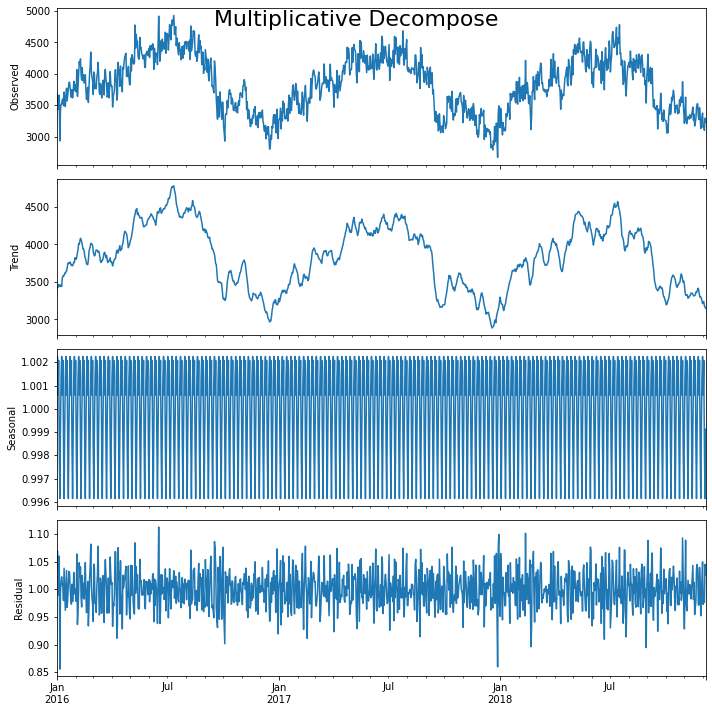

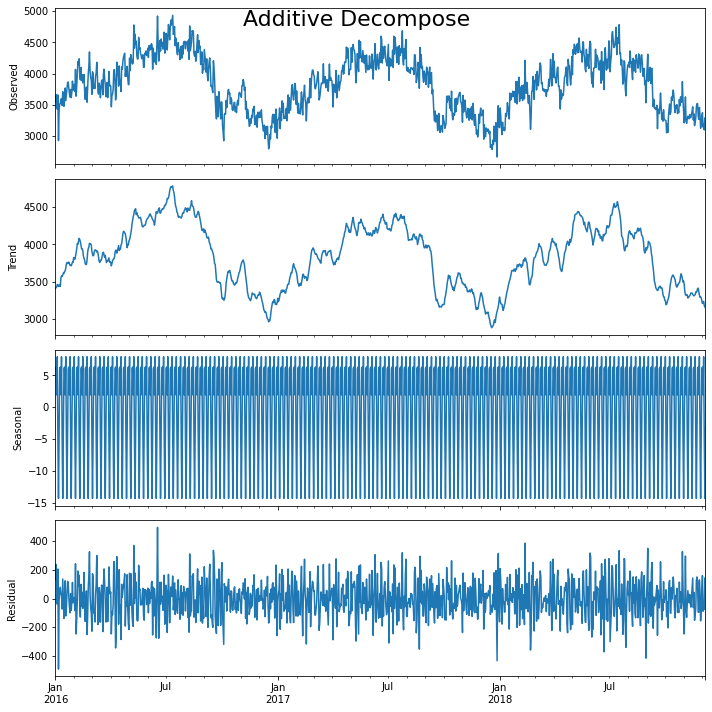

In [ ]:
# your code here
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import matplotlib.pyplot as plt

df_products.index = pd.to_datetime(df_products.index)
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df_products['product_11'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df_products['product_11'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()



## 1.2. Масштаб
<ol>
    <li> Какой масштаб у рядов? </li>
    2016-01-01 -----> 2018-12-06
    <li> Какой разброс значений внутри каждого ряда? </li>
    см код ниже
    <li> Может ли это как-то помешать при прогнозировании? </li>
    Да, есть variance большой и есть много более-менее рандомных колебаний, то их сложнее предсказать.
</ol>

In [ ]:
# your code here
product = 'product_11'
print("Разброс значений (выберите интересуемый товар)\nMaximum value:")
print(df_products[product].max())
print("Minimum value: ")
print(df_products[product].min())
print("Mean: ")
print(df_products[product].mean())
print("Standart deviation: ")
print(df_products[product].std())

Разброс значений (выберите интересуемый товар)
Maximum value:
4932.4
Minimum value: 
2669.8
Mean: 
3835.760971055087
Standart deviation: 
439.86623135296884


## 1.3. Аномалии
<ol>
    <li>Есть ли в рядах выбросы?</li>
    После применения сглаживания кажется, что чего-то особо критично выбивающегося из сглаженного графика почти нет. At least in my humble opinion.
    <li>Как выбросы могут повлиять на прогнозирование?</li>
    Вбросы == плохо, ибо непредсказуемо.
    <li>Что с ними можно сделать?</li>
    Сгладить.
</ol>

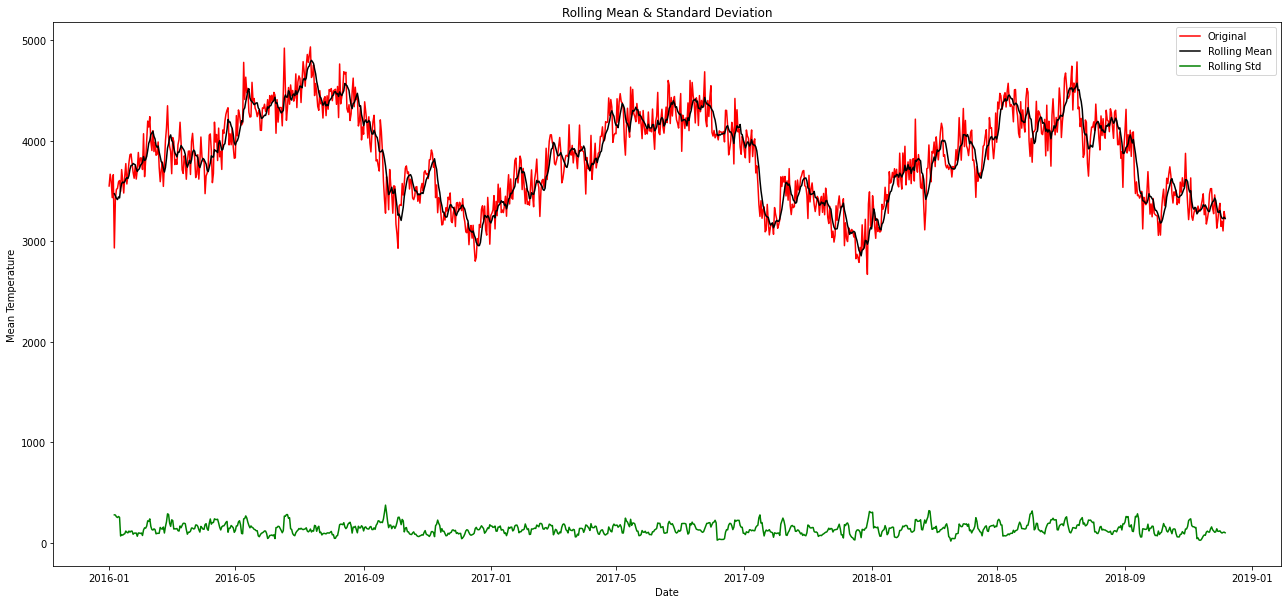

Test statistic:  -2.9904272835842822
p-value:  0.03579809388962899
Critical Values: {'1%': -3.4364992651202697, '5%': -2.8642551098431968, '10%': -2.5682156239065925}


In [ ]:
# your code here
# adfuller library 
from statsmodels.tsa.stattools import adfuller
# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
# check_mean_std
def check_mean_std(ts):
    #Rolling statistics
    rolmean = ts.rolling(window=6).mean()
    rolstd = ts.rolling(window=6).std()
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    
# check stationary: mean, variance(std)and adfuller test
check_mean_std(df_products['product_11'])
check_adfuller(df_products['product_11'])

## 1.4. Взаимосвязь рядов
<ol>
    <li>Коррелируют ли ряды между собой?</li>
    Да, некоторые аж до 76% (продукт 13 и 15)
    <li>Можно ли как-то это использовать? Если да, как? Если нет, почему?</li>
    Это можно использовать. Seems like это могут быть товары, которые продаются комплектом или связанные с сезонами. Их продажи more likely to be похожими. Можно основывать предсказания товара сразу на двух timeseries, например.
</ol>

In [ ]:
df_products.corr()

,product_10,product_11,product_12,product_13,product_14,product_15,product_16,product_17,product_18,product_19,...,product_30,product_31,product_32,product_33,product_34,product_35,product_36,product_37,product_38,product_39
product_10,1.000000,-0.131447,0.281239,-0.309543,0.025993,0.009442,0.054918,0.078663,0.241046,-0.306950,...,-0.107805,0.237936,0.308242,0.190706,0.310958,0.223508,0.005282,0.014191,-0.234492,0.329364
product_11,-0.131447,1.000000,-0.192617,0.333812,0.090805,-0.208369,-0.492895,-0.043901,0.284838,0.205975,...,-0.329456,-0.072642,-0.107900,-0.373993,-0.137041,-0.026805,-0.321229,0.178208,0.544646,-0.412785
product_12,0.281239,-0.192617,1.000000,-0.609158,0.488587,0.577015,-0.010995,-0.315760,0.342759,0.082900,...,-0.261039,-0.081049,-0.018275,0.159630,0.036909,0.172376,0.309149,0.347756,-0.013645,0.059630
product_13,-0.309543,0.333812,-0.609158,1.000000,-0.712080,-0.760959,0.134786,0.484757,-0.415092,-0.106995,...,0.535469,-0.155433,-0.033926,-0.289537,-0.289862,-0.275546,-0.472861,-0.426720,0.064823,-0.414016
product_14,0.025993,0.090805,0.488587,-0.712080,1.000000,0.803569,-0.353027,-0.654971,0.534834,0.360082,...,-0.733617,-0.093339,-0.383741,0.006809,-0.058285,0.292795,0.308093,0.504702,0.340047,-0.115030
product_15,0.009442,-0.208369,0.577015,-0.760959,0.803569,1.000000,-0.116496,-0.652040,0.451048,0.509307,...,-0.506896,-0.312376,-0.324223,0.183555,-0.139283,0.029586,0.453327,0.498613,0.228643,-0.047311
product_16,0.054918,-0.492895,-0.010995,0.134786,-0.353027,-0.116496,1.000000,0.326483,-0.458517,-0.232566,...,0.577781,0.025253,-0.027672,0.239510,-0.089726,0.087730,-0.148736,-0.300166,-0.547305,-0.028114
product_17,0.078663,-0.043901,-0.315760,0.484757,-0.654971,-0.652040,0.326483,1.000000,-0.400897,-0.461597,...,0.500134,0.244081,0.260150,-0.002718,0.109998,-0.018884,-0.313983,-0.415149,-0.332176,0.138745
product_18,0.241046,0.284838,0.342759,-0.415092,0.534834,0.451048,-0.458517,-0.400897,1.000000,0.331757,...,-0.570629,-0.143815,0.014189,-0.035437,0.078287,-0.046228,0.242826,0.433509,0.509368,0.027362
product_19,-0.306950,0.205975,0.082900,-0.106995,0.360082,0.509307,-0.232566,-0.461597,0.331757,1.000000,...,-0.274432,-0.560104,-0.208095,0.030351,-0.266497,-0.530703,0.264060,0.355638,0.605789,-0.293703


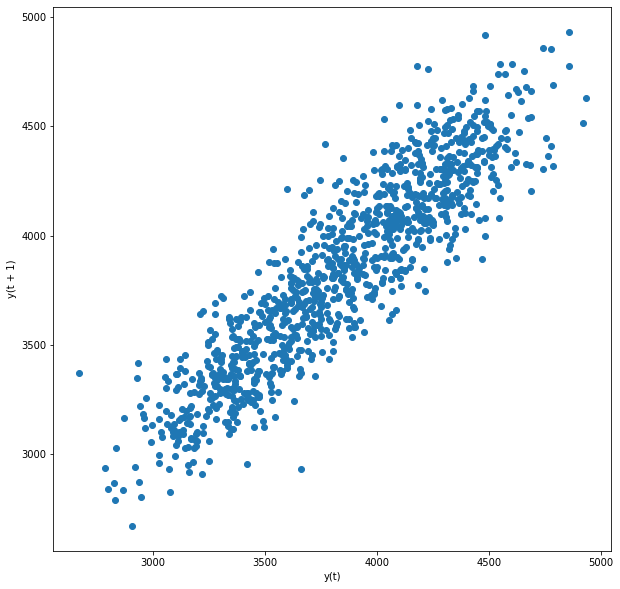

In [ ]:
# your code here
pd.plotting.lag_plot(df_products['product_11'])

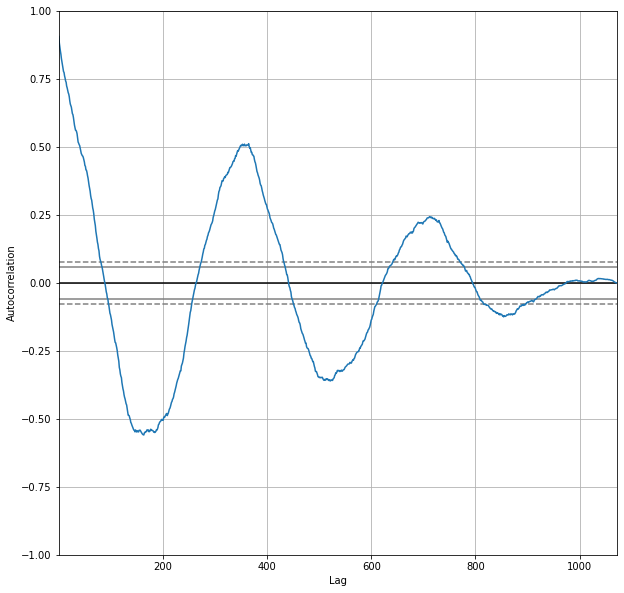

In [ ]:
pd.plotting.autocorrelation_plot(df_products['product_11'])

## 1.5. Акции
<ol>
    <li>Что из себя представляет датасет с акциями?</li>
    Наличие какой-то ноунейм акции (1/0, True/False) в какой-то день.
    <li>Как часто происходит каждая акция?</li>
    код ниже, замените промоушон на интересующий.
    <li>Рекламная акция для какого-то продукта влияет на его продажи. Может ли она повлиять на продажи других продуктов?</li>
    Да, ибо есть товары, которые покупают комплектом (если покупают хлопья, то, может, заодно и молоко к нему тоже)ю
    <li>Есть ли акции, которые пересекаются по времени? Могут ли сразу несколько акций повлиять на один продукт?</li>
    Да, много. Да, несколько акций могут повлиять на один продукт, потому что, как я уже упоминал, есть товары, которые покупают в комплекте, и рекламируя один товар, спрос на друго тоже возрастет.


</ol>

In [ ]:
# your code here
promotion = 'promotion_0'
print("Частота акции", promotion, ": ",df_promotions[promotion].sum()/len(df_promotions[promotion]))
print(df_promotions[promotion].value_counts())
df_promotions.head()

Частота акции promotion_0 :  0.8575342465753425
1.0    939
0.0    156
Name: promotion_0, dtype: int64


,promotion_0,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,promotion_7,promotion_8,promotion_9,...,promotion_990,promotion_991,promotion_992,promotion_993,promotion_994,promotion_995,promotion_996,promotion_997,promotion_998,promotion_999
2016-01-01,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2016-01-02,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2016-01-03,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2016-01-04,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2016-01-05,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0


In [ ]:
print("Кол-во акций, проводимых в конкретный день:")
df_promotions.sum(axis=1)

Кол-во акций, проводимых в конкретный день:


2016-01-01    508.0
2016-01-02    511.0
2016-01-03    520.0
2016-01-04    518.0
2016-01-05    525.0
              ...  
2018-12-26    501.0
2018-12-27    497.0
2018-12-28    497.0
2018-12-29    501.0
2018-12-30    495.0
Length: 1095, dtype: float64

## 1.6. Ваш ход
Может быть, есть еще что-то интересное, чего мы не заметили? :)

Графики спроса продуктов выглядят как зашумленные/преобразованные/сложенные синусоиды.

Совет дня: если Вам в жизни не хватает денег, то нужно просто стать богатыми, и тогда денег будет хватать.

***
# 2. Прогнозирование
В этом блоке предлагается построить прогноз на указанный промежуток времени и ответить на вопросы о метриках и валидации результатов.

<i>Возможно, в этом блоке не получится разбить код на предложенные части; в таком случае следует оставить максимально подробный комментарий к происходящему. </i>

In [ ]:
HORIZON = 24 # горизонт прогнозирования

## 2.1. Пайплайн прогнозирования
### 2.1.1. Подготовка данных
<ol>
    <li>Нужно ли как-то предобрабатывать ряды из датасета?</li>
    Их можно сгладить для избавления от вбросов и лучших предсказаний, сделать differencing, если ряд не стационарный.
    <li>Какие признаки можно выделить из данных?</li>
    Можно выделить статистические признаки (mean, variance), проверить на стационарность. 
    <li>Какие признаки можно извлечь из индекса timestamp?</li>
    Год, месяц, день
    <li>Как использовать данные об акциях?</li>
    Использовать в SATIMAX модели для улучшения предсказаний.
    <li>*Есть ли среди выделенных признаков categorical признаки? Если есть, как с ними работать?</li>
    Спрос может зависеть от дня недели (закупка вкуснышек на выходные). Это можно использовать.
</ol>

### 2.1.2. Модель
Какие модели прогнозирования могут помочь в нашей задаче? В чем их особенности, плюсы и минусы?

In [ ]:
# AutoRegression
from statsmodels.tsa.ar_model import AR
#create train/test datasets
X = df_products['product_11'].dropna()
train_data = X[1:len(X)-HORIZON]
test_data = X[len(X)-HORIZON:]

#train the autoregression model
model = AR(train_data)
model_fitted = model.fit()

print('The lag value chose is: %s' % model_fitted.k_ar)
print('The coefficients of the model are:\n %s' % model_fitted.params)

The lag value chose is: 22
The coefficients of the model are:
 const             114.808364
L1.product_11       0.496498
L2.product_11       0.163050
L3.product_11       0.109517
L4.product_11       0.067694
L5.product_11       0.064731
L6.product_11      -0.009858
L7.product_11       0.031755
L8.product_11      -0.006777
L9.product_11       0.002904
L10.product_11     -0.019469
L11.product_11      0.065979
L12.product_11     -0.024829
L13.product_11      0.027607
L14.product_11     -0.021609
L15.product_11      0.051856
L16.product_11     -0.051245
L17.product_11      0.017394
L18.product_11     -0.003594
L19.product_11      0.002305
L20.product_11      0.037932
L21.product_11      0.030890
L22.product_11     -0.062811
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


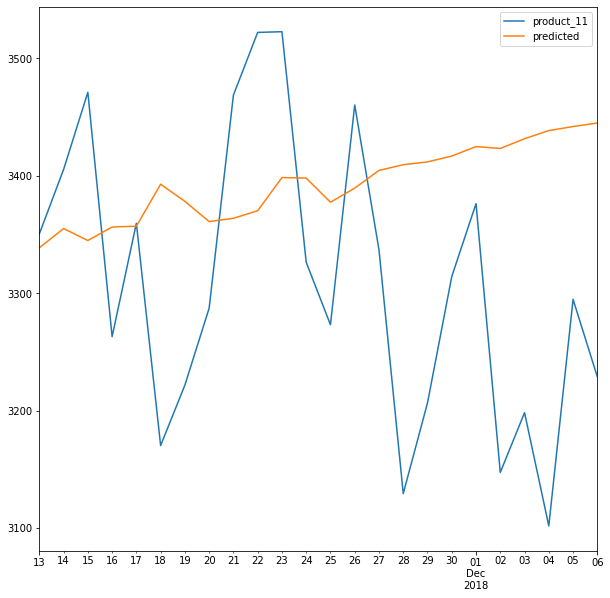

In [ ]:
# make predictions 
predictions = model_fitted.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)

# create a comparison dataframe
compare_df = pd.concat(
    [df_products['product_11'].tail(HORIZON),
    predictions], axis=1).rename(
    columns={'stationary': 'actual', 0:'predicted'})

#plot the two values
compare_df.plot()

In [ ]:
# Справилась плохо

In [ ]:
# # ARIMA LİBRARY
# from statsmodels.tsa.arima_model import ARIMA
# from pandas import datetime

# # fit model
# model = ARIMA(df_products['product_11'], order=(5,0,1)) # (ARMA) = (1,0,1)
# model_fit = model.fit(disp=0)


# pred = model_fit.predict(
#     start=len(train_data), 
#     end=len(train_data) + len(test_data)-1).rename('ARIMA predictions')

# model_fit.plot_predict(dynamic=False)

# pred.plot(legend=True)
# df_products['product_11'].plot(legend=True) 

# # predict
# start_index = datetime(1944, 6, 25)
# end_index = datetime(1945, 5, 31)
# forecast = model_fit.predict(start=start_index, end=end_index)

# # visualization
# plt.figure(figsize=(22,10))
# plt.plot(weather_bin.Date,weather_bin.MeanTemp,label = "original")
# plt.plot(forecast,label = "predicted")
# plt.title("Time Series Forecast")
# plt.xlabel("Date")
# plt.ylabel("Mean Temperature")
# plt.legend()
# plt.show()

In [ ]:
!pip install fbprophet

In [ ]:
train_dataset= pd.DataFrame(columns=['ds','y'])
print(train_data)

train_dataset['y']=train_data #.to_datetime(train_data['product_11']).dt.strftime('%Y-%m-%d')
train_dataset['ds'] = train_data.index
train_dataset

2016-01-02    3666.3
2016-01-03    3593.0
2016-01-04    3432.9
2016-01-05    3661.1
2016-01-06    2932.5
               ...  
2018-11-08    3299.3
2018-11-09    3279.9
2018-11-10    3349.2
2018-11-11    3299.5
2018-11-12    3298.7
Name: product_11, Length: 1046, dtype: float64


,ds,y
2016-01-02,2016-01-02,3666.3
2016-01-03,2016-01-03,3593.0
2016-01-04,2016-01-04,3432.9
2016-01-05,2016-01-05,3661.1
2016-01-06,2016-01-06,2932.5
...,...,...
2018-11-08,2018-11-08,3299.3
2018-11-09,2018-11-09,3279.9
2018-11-10,2018-11-10,3349.2
2018-11-11,2018-11-11,3299.5


In [ ]:
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
# define the model
model = Prophet(interval_width=0.95, daily_seasonality=True)
# train_data = train_data.to_frame()
# train_data.columns = ['ds', 'y']

# train_data['ds']= pd.to_datetime(train_data['ds']).dt.strptime(date_time_str, '%Y-%m-%d')
df = train_dataset
# fit the model
model.fit(df)
# define the period for which we want a prediction
# future = list()
# for i in range(1, 13):
# 	date = '2018-%02d' % i
# 	future.append([date])
future = pd.date_range(start='2018-10-20', end='2018-11-12')
# future['ds'] = pd.to_datetime(future['ds'])
future = future.to_frame()
future.columns = ['ds']
future

,ds
2018-10-20,2018-10-20
2018-10-21,2018-10-21
2018-10-22,2018-10-22
2018-10-23,2018-10-23
2018-10-24,2018-10-24
2018-10-25,2018-10-25
2018-10-26,2018-10-26
2018-10-27,2018-10-27
2018-10-28,2018-10-28
2018-10-29,2018-10-29


MSE: 25838.655


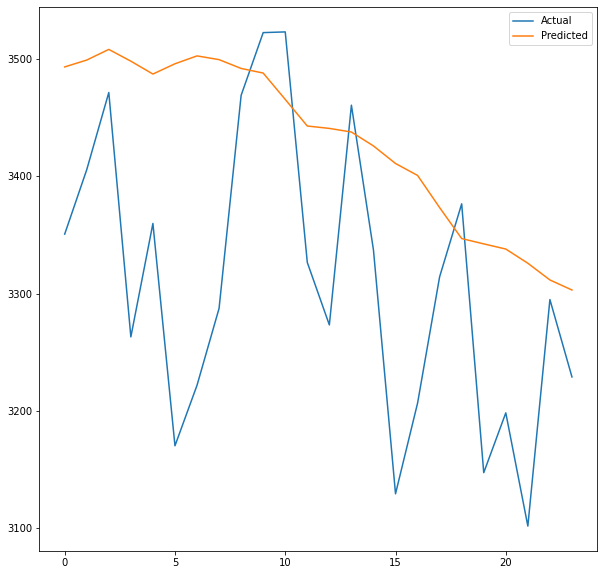

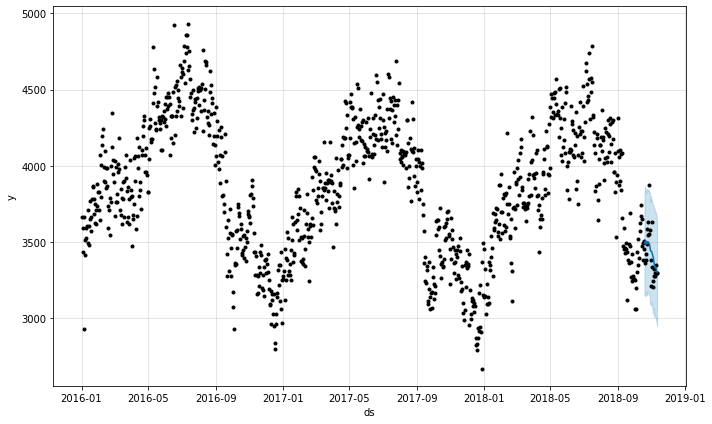

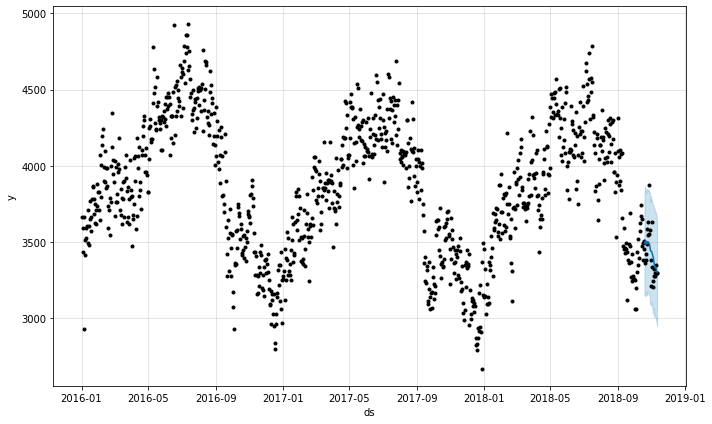

In [ ]:
# use the model to make a forecast
forecast = model.predict(future)
# calculate MSE between expected and predicted values for december
y_true = df_products['product_11'][-HORIZON:].values
y_pred = forecast['yhat'].values
mse = mean_squared_error(y_true, y_pred)
print('MSE: %.3f' % mse)
forecast['ds'] = pd.to_datetime(forecast['ds'])
# print(forecast)

# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

model.plot(forecast)


In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))

# перебираем коэффициенты для Аримы и находим те, при которые наименьшая AIC метрика
# итого отсюда получаем, что лучшие коэффициенты: (1,1,1)
for param in pdq:
    try:
        model_arima = ARIMA(df_products['product_11'],order=param)
        model_arima_fit = model_arima.fit(disp=-1)
        print(param,model_arima_fit.aic)
    except:
        continue



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(0, 0, 0) 16079.586026920633
(0, 0, 1) 15279.358473048742
(0, 0, 2) 14902.734910118601
(0, 0, 3) 14688.939242880497


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(0, 0, 4) 14557.917905089049
(0, 1, 0) 14253.183966724768
(0, 1, 1) 14015.481071583177
(0, 1, 2) 14008.63682458411
(0, 1, 3) 14009.889088670596
(0, 2, 0) 15316.87405903634


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

(0, 2, 1) 14249.779494725113
(1, 0, 0) 14219.951437201755


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

(1, 0, 1) 14023.673022338102


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(1, 0, 2) 14018.570130936627


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(1, 0, 3) 14020.20452544199


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(1, 0, 4) 14022.144555120474
(1, 1, 0) 14099.256586967978


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(1, 1, 1) 14007.902267436757


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(1, 1, 2) 14009.321115255847


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(1, 1, 3) 14010.190736552007


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(1, 1, 4) 14011.641874727751
(1, 2, 0) 14812.295656375878


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

(1, 2, 4) 14008.571099556488
(2, 0, 0) 14092.227808151456


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(2, 0, 1) 14018.200203828208


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(2, 0, 2) 14020.107599114835


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(2, 0, 3) 14021.609253964398


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(2, 0, 4) 14022.098514714104


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(2, 1, 0) 14048.052030019036


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(2, 1, 1) 14009.584005333423


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(2, 1, 2) 14010.257697140696


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(2, 1, 3) 14012.188468853183


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(2, 1, 4) 14012.346022825055


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(2, 2, 0) 14575.200528325984


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

(2, 2, 4) 14015.748193286316
(3, 0, 0) 14049.463825073006


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(3, 0, 1) 14020.127437354902


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(3, 0, 2) 14021.664640499363


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(3, 0, 3) 14023.60813751685


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(3, 0, 4) 14022.778726991077
(3, 1, 0) 14027.955030058129


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(3, 1, 1) 14011.166111563147


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(3, 1, 2) 14011.46230712522


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(3, 1, 3) 14012.186783713601


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(3, 1, 4) 14014.035063383091


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(3, 2, 0) 14438.476941067807


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(3, 2, 1) 14025.847869480913


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

(3, 2, 4) 14010.440428222952
(4, 0, 0) 14033.155285502919


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(4, 0, 1) 14022.034889053743


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(4, 0, 2) 14022.169229924279


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(4, 0, 3) 14022.74574545788


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(4, 0, 4) 14024.73586234944
(4, 1, 0) 14019.337516537535

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)



(4, 1, 1) 14012.446483311289


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(4, 1, 2) 14013.44880747542


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(4, 1, 3) 14014.134028529259


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(4, 1, 4) 14012.288531371261
(4, 2, 0) 14335.007996481792


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(4, 2, 1) 14017.366322607768


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(4, 2, 2) 14024.110608086463


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Running ARIMA with random numbers
model_arima = ARIMA(df_products['product_11'], order=(1,1,1)) 
model_arima_fit = model_arima.fit(disp=-1)

# Saving ARIMA predictions
fcast1 = model_arima_fit.forecast(HORIZON)[0]

# Setting the Index for horizon days
index_horizon = pd.date_range(df_products['product_11'].index[-1], freq='D', periods = HORIZON)

# Passing the same index as the others
fcast1 = pd.Series(fcast1, index=index_horizon)
fcast1 = fcast1.rename("Arima") 
print(mean_squared_error(fcast1, df_products['product_11'][-HORIZON:]))
fcast1
# df_products['product_11']

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


21623.985414561783


2018-12-06    3227.586209
2018-12-07    3227.091140
2018-12-08    3226.759178
2018-12-09    3226.456174
2018-12-10    3226.158310
2018-12-11    3225.861359
2018-12-12    3225.564571
2018-12-13    3225.267811
2018-12-14    3224.971056
2018-12-15    3224.674302
2018-12-16    3224.377548
2018-12-17    3224.080795
2018-12-18    3223.784041
2018-12-19    3223.487287
2018-12-20    3223.190533
2018-12-21    3222.893780
2018-12-22    3222.597026
2018-12-23    3222.300272
2018-12-24    3222.003519
2018-12-25    3221.706765
2018-12-26    3221.410011
2018-12-27    3221.113257
2018-12-28    3220.816504
2018-12-29    3220.519750
Freq: D, Name: Arima, dtype: float64

In [ ]:
# статистическая инфа о ряде
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.product_11   No. Observations:                 1070
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6999.951
Method:                       css-mle   S.D. of innovations            167.819
Date:                Tue, 29 Mar 2022   AIC                          14007.902
Time:                        19:57:40   BIC                          14027.804
Sample:                    01-02-2016   HQIC                         14015.441
                         - 12-06-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2968      1.990     -0.149      0.881      -4.197       3.603
ar.L1.D.product_11     0.1775      0.056      3.164      0.002       0.068       0.287
ma.L1.D.product_11    -0.6816      0.043    -15.845      0.000      -0.766      -0.597
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            5.6326           +0.0000j            5.6326            0.0000
MA.1            1.4672           +0.0000j            1.4672            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
# model_arima_fit.plot_diagnostics()

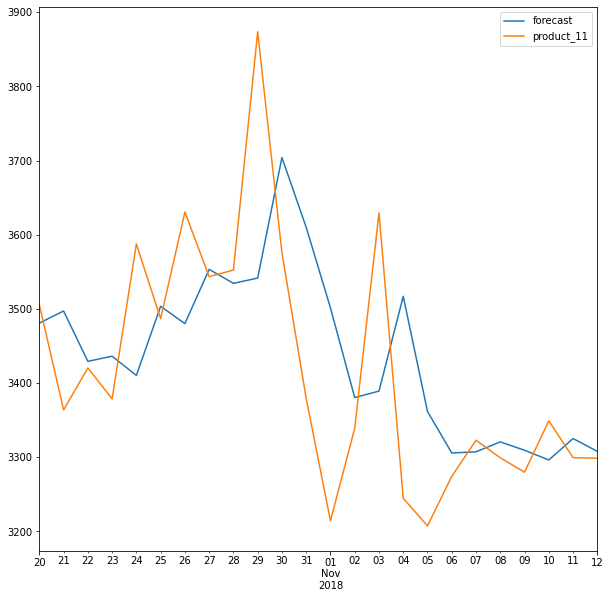

The MSE of ARIMA is: 21623.985414561783


In [ ]:
# # Ploting the predictions
# fig, ax = plt.subplots(figsize=(15,5))
# chart = sns.lineplot(x='index', y='product_11', data = df_products['product_11'])
# chart.set_title('AU')
# fcast1.plot(ax=ax, color='red', marker="o", legend=True)
# df_products['product_11'].plot(ax=ax, color='blue', marker="o", legend=True)

model_arima_fit.plot_predict(dynamic=False, start='2018-10-20', end='2018-11-12')
plt.show()

# Printing the AI
print('The MSE of ARIMA is:', mean_squared_error(df_products['product_11'][-HORIZON:].values, fcast1.values))

In [ ]:
# sns.factorplot(data= df, 
#                x= 'promotion',
#                y= 'Sold',
#                hue= 'Product');

In [ ]:
# LSTM модель

In [ ]:
# import math
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib as mpl 
# from keras.models import Sequential
# from sklearn.preprocessing import MinMaxScaler
# from keras.layers import LSTM, Dense, TimeDistributed, Dropout, Activation

# # Settings
# epochs = 4; batch_size = 1; sequencelength = 15; n_features = 1

# # Get the number of rows to train the model on 80% of the data
# npdataset = df.values
# training_data_length = math.ceil(len(npdataset) * 0.6)

# # Transform features by scaling each feature to a range between 0 and 1
# mmscaler = MinMaxScaler(feature_range=(0, 1))
# scaled_data = mmscaler.fit_transform(npdataset)

# # Create a scaled training data set
# train_data = scaled_data[0:training_data_length, :]

# # Split the data into x_train and y_train data sets
# x_train = []; y_train = []
# trainingdatasize = len(train_data)
# for i in range(sequencelength, trainingdatasize-1):
#     x_train.append(train_data[i-sequencelength : i, 0]) 
#     y_train.append(train_data[i, 0])  # contains all other values

# # Convert the x_train and y_train to numpy arrays
# x_train = np.array(x_train); y_train = np.array(y_train)

# # Reshape the data
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# print("x_tain.shape: " + str(x_train.shape) + " -- y_tain.shape: " + str(y_train.shape))

In [ ]:
# # Configure and compile the neural network model
# # The number of input neurons is defined by the sequence length multiplied by the number of features
# lstm_neuron_number = sequencelength * n_features

# # Create the model
# model = Sequential()
# model.add(
#     LSTM(lstm_neuron_number, return_sequences=False, input_shape=(x_train.shape[1], 1))
# )
# model.add(Dense(1))
# model.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
# # Settings
# batch_size = 5

# # Train the model
# history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

## 2.2. Валидация 
### 2.2.1. Метрики
<ol>
    <li>Какие метрики качества могут быть использованы в нашей задаче?</li>
    AIC, MAE, MSE
    <li>В качестве метрики качества мы хотим использовать MSE; с какими проблемами мы можем столкнуться?</li>
    Очень большие числа ошибок.
</ol>

### 2.2.2. Кросс-валидация
Как провести кросс-валидацию?
Разделить кусочно исходные данные на разные пары тренировочных и тестовых, обучить несколько моделей на них и брать средний результат предсказаний. 

### 2.2.3. Сравнение моделей
Предположим, мы построили несколько пайплайнов прогнозирования. Как выбрать лучший из них?
<ol>
    <li>В датасете 30 рядов, мы посчитали метрику для каждого из них, но нам надо понять, какой из пайплайнов работает лучше; как это сделать?</li>
    Взять среднее арифметическое по метрикам со всех рядов.
    <li>Мы выбрали лучший из пайплайнов; можно ли еще улучшить его? Когда стоит остановиться?</li>
    Можно продолжить играться с гиперпараметрами, перебирая grid search'ем. Сохранять гиперпараметры лучшей модели.
    <li>*Если в предыдущих частях были рассмотрены несколько пайплайнов, какой оказался лучшим? Как выглядит лучший прогноз? (Если выше был рассмотрен один пайплайн, пропустите этот пункт)</li>
    Лучший - SARIMAX. Он в топах моделей для timeseries.
</ol>

## 2.3. Использование доп данных
<ol>
    <li>Получилось ли использовать данные об акциях при построении прогнозов?</li>
    Это немного сложно, нет.
    <li>Если да, помогают ли они предсказывать точнее?</li>
    Определенно.
    <li>Как понять, какие из акций важны, а какие нет? Могут ли скоррелированные признаки помешать оценке важности признака? Что с этим делать?</li>
    Можно скалькулировать significance акции, метрика того, насколько продажи после нее возрасли. Скоррелированные признаки мешают оценке акции, потому что много других акций и продаж других товаров тоже влияют на продажи конкретного товара, поэтому сложнее сказать, чем именно вызван рост продаж.
</ol>

## 2.4. Production 🚀
Мы построили восхитительный пайплайн прогнозирования! Как вывести его в продакшн?

Можно сделать трейдер-бота и на этом зарабатывать. Продавать подписку на предсказания бота. Вставить рекламу. Обрабатывать новости и пытаться выявить те, которые влияют на трейдерную вещь, и на них делать прогнозы.

***
# Свободная часть
Часть для самых смелых энтузиастов в мире временных рядов! 

Здесь предлагается попробовать сделать с датасетом что-то интересное на ваш вкус. Можно попробовать сделать что-то из предложенного:
- Покрутить датасет `dataset/influence.csv`: в нем дана матрица влияния каждой акции на каждый временной ряд продаж. Как ее можно использовать? Как это может помочь при прогнозировании? 
- Поглубже погрузиться в изучение "близости" временнях рядов и попробовать использовать эти знания для прогнозирования
- Подумать о том, как можно оценить влияние какого-то внешнего фактора-признака? Допустим, у нас есть такой же датасет с продажами и мы знаем, что определенная акция должна была повлиять на конкрентный ряд. Как оценить это влияние?
- Любая другая тема, которая кажется важной и интересной

In [ ]:
# АНЕКДОТ
# Засиделся java-программист поздно вечером на работе и уснул за столом.
# Приходит garbage collector, ошибочно думает, что тот больше не будет использоваться,
# и бросает того программиста в сингулярность.
# Конец.